## Fifth Assignment
Giovanni Celotto

due May 15

In [2]:
library(ggplot2)


library(tidyverse)
library(lubridate)
library(gridExtra)
library(grid)
library(lattice)


library('Cairo')
CairoFonts(
regular="FreeSans:style=Medium",
bold="FreeSans:style=Bold",
italic="FreeSans:style=Oblique",
bolditalic="FreeSans:style=BoldOblique")

#install.packages("fields")
#library(spam)
library('fields')


### Exercise 1
The number of particles emitted by a radioactive source during a fixed interval of time ($\Delta t = 10 s$) follows a Poisson distribution on the parameter $\mu$. The number of particles observed during consecutive time intervals is: 4, 1, 3, 1 and 3

(a) suppose a uniform prior distribution for the parameter $\mu$
- determine and draw the posterior distribution for $\mu$, given the data
- evaluate mean, median and variance, both analytically and numerically in R

#### Solution
We are dealing with a process described by the Poisson distribution. Since the measurements can be considered indipendent the overall likelihood is the product of the distributions:
$$
f\{x_j|\mu\}\propto\mu^{\sum x_j} e^{-n\mu}
$$
that is a $\Gamma(\alpha, \lambda)$ distribution with $$\alpha=\sum x_j+1 \newline
\lambda=n$$
The exercise asks to use a uniform prior:
$$
P(\mu|\{x_j\})\propto f(\{x_j\}|\mu)g(\mu)=\mu^{\sum x_j} e^{-n\mu}
$$
We conclude that the posterior will be (as we knew) just proportional to the likelihood, hence a $\Gamma(\alpha, \lambda)$ distribution with the parameters written above

Parameters used: 
alpha =  	 13 
lambda =	 5 


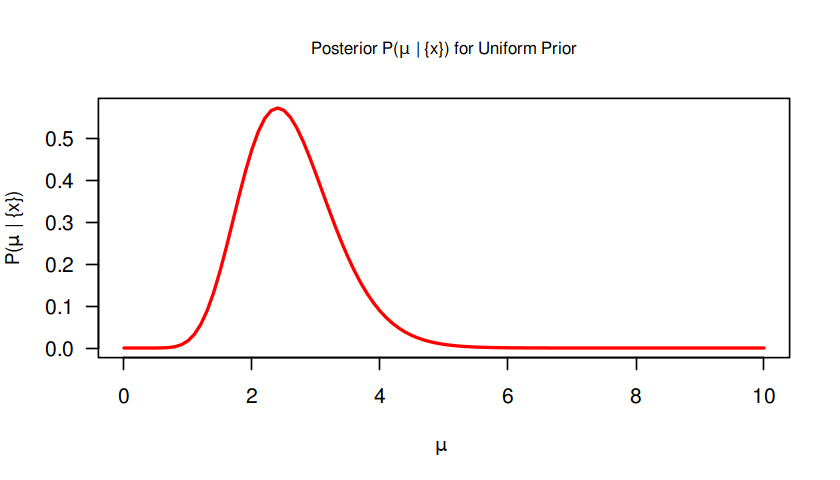

In [4]:
options(repr.plot.width=7, repr.plot.height=4) 
meas <- c(4,1,3,1,3)

alpha_uni <- sum(meas)+1
lambda <- length(meas)
cat("Parameters used: \n")
cat("alpha =  \t", alpha_uni,"\n")
cat("lambda =\t", lambda,"\n")

curve (dgamma(x, shape=alpha_uni, scale=1/lambda),0,10,
      lwd=2, 
      col=" red ",
      xlab=expression(paste(mu)), 
      las=1,
      ylab=expression(paste("P(", mu, "| {x})")),
      main=expression(paste("Posterior P(", mu, "| {x}) for Uniform Prior")), 
      pch=1,
      cex=0.1,
      cex.lab=0.9,
      cex.main=0.8,
      cex.axis=1
      )

#### Evaluation of mean, median, variance
Analytically, knowing the properties of $\Gamma$ distributions we can get the required values:

In [5]:
options(digits=8) #in order to be sensible to the difference between numerical and analytical
mean_uni = alpha_uni/lambda
var_uni  = alpha_uni/lambda**2
cat("ANALYTICALLY\n\n")
cat("Mean     =\t", mean_uni, "\n")
cat("Variance =\t", var_uni,"\n\n\n")

cat("NUMERICALLY\n\n")
#sample x axis (parameter values)
interval <- seq(0,10,.01)
y_val <- dgamma(interval, shape=alpha_uni, scale=1/lambda)

#function to evaluate expectation value on an interval
exp_val <- function(x){
    return (sum(y_val*x)/sum(y_val))
}

num_mean_uni = exp_val(interval)
num_var_uni  = exp_val(interval**2)-exp_val(interval)**2
cat("Mean     =\t", num_mean_uni, "\n")
cat("Variance =\t", num_var_uni,"\n")
options(digits=3)
cat("Median   =\t", qgamma(0.5, shape = alpha_uni, scale=1/lambda),"\n\n\n")

ANALYTICALLY

Mean     =	 2.6 
Variance =	 0.52 


NUMERICALLY

Mean     =	 2.6 
Variance =	 0.51999999 
Median   =	 2.53 




Note that for the Gamma distribution there is no simple closed form for the median, this means that an analytical calculation is not possible

(b) suppose a Jeffreys prior for the parameter $\mu$
- determine and draw the posterior distribution for $\mu$, given the data
- evaluate mean, median and variance, both analytically and numerically in R

#### Solution
Repeating the arguments used above we know the prior is now proportional to $1/\sqrt{\mu}$. As a consequence, being the likelihood the same written above, the product of the two will be
$$
P(\mu|\{x_j\})\propto f(\{x_j\}|\mu)g(\mu)=\mu^{\sum x_j-1/2} e^{-n\mu}
$$
This can be seen as a $\Gamma(\alpha, \lambda)$ distribution with paramters 
$$
\alpha = \sum x_j +1/2 \newline
\lambda = n
$$

Paramters used: 
alpha_jef  =	 12.5 
lambda =	 5 


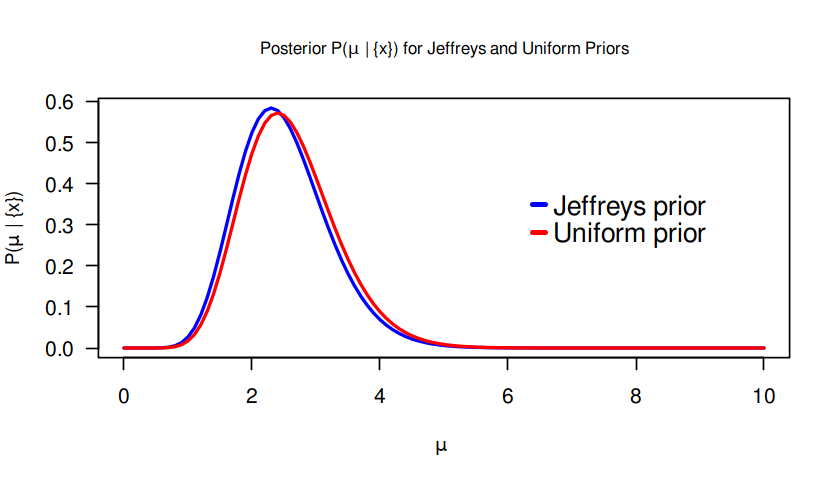

In [6]:
alpha_jef <- sum(meas)+1/2
lambda <- length(meas)
cat("Paramters used: \n")
cat("alpha_jef  =\t", alpha_jef,"\n")
cat("lambda =\t", lambda,"\n")

curve (dgamma(x, shape=alpha_jef, scale=1/lambda),0,10,
      lwd=2, 
      col=" blue ",
      xlab=expression(paste(mu)), 
      las=1,
      ylab=expression(paste("P(", mu, "| {x})")),
      main=expression(paste("Posterior P(", mu, "| {x}) for Jeffreys and Uniform Priors")), 
      pch=1,
      cex=0.1,
      cex.lab=0.9,
      cex.main=0.8,
      cex.axis=1
      )
curve (dgamma(x, shape=sum(meas)+1, scale=1/lambda),0,10,
      lwd=2, 
      col=" red ",
      add=TRUE
      )

legend(6, .4,
       legend=c("Jeffreys prior",
                "Uniform prior"),
       col=c(" blue ",
             " red "),
       cex=1.3,
       x.intersp=0.3,
       y.intersp=2,
       bty = "n",
       lty=1,
       lwd=3,
       seg.len=0.5)

In [7]:
mean_jef = alpha_jef/lambda
var_jef  = alpha_jef/lambda**2
cat("ANALYTICALLY for jef Prior\n\n")
cat("Mean     =\t", mean_jef, "\n")
cat("Variance =\t", var_jef,"\n\n\n")

cat("NUMERICALLY for jef Prior\n\n")
y_val <- dgamma(interval, shape=alpha_jef, scale=1/lambda)

exp_val <- function(x){
    return (sum(y_val*x)/sum(y_val))
}

# OUTPUT
options(digits=9)
num_mean_jef = exp_val(interval)
num_var_jef  = exp_val(interval**2)-exp_val(interval)**2
cat("Mean     =\t", num_mean_jef, "\n")
cat("Variance =\t", num_var_jef,"\n")
options(digits=3)
cat("Median   =\t", qgamma(0.5, shape = alpha_jef, scale=1/lambda),"\n\n\n")

ANALYTICALLY for jef Prior

Mean     =	 2.5 
Variance =	 0.5 


NUMERICALLY for jef Prior

Mean     =	 2.5 
Variance =	 0.499999996 
Median   =	 2.43 




(c) evaluate a 95% credibility interval for the results obtained with both priors. Compare the result
with that obtained using a normal approximation for the posterior distribution, with the same mean
and standard deviation

In [8]:
#UNIFORM
xlow_uni <- qgamma (0.025, shape = alpha_uni, scale = 1/lambda)
xhigh_uni <- qgamma (0.975, shape = alpha_uni, scale = 1/lambda)

#Gaussian approximation for uniform prior
xlow_norm_uni <- qnorm(0.025, mean_uni, sqrt(var_uni))
xhigh_norm_uni <- qnorm(0.975, mean_uni, sqrt(var_uni))


cat("UNIFORM PRIOR \n")
cat("95% credibility interval:    \t[",xlow_uni,",",xhigh_uni,"]\n")
cat("Using Gaussian approximation:\t[",xlow_norm_uni,",",xhigh_norm_uni,"]")

#JEFFREYS
xlow_jef <- qgamma (0.025, shape = alpha_jef, scale = 1/lambda)
xhigh_jef <- qgamma (0.975, shape = alpha_jef, scale = 1/lambda)

#Gaussian approximation for jeffre's prior
xlow_norm_jef <- qnorm(0.025, mean_jef, sqrt(var_jef))
xhigh_norm_jef <- qnorm(0.975, mean_jef, sqrt(var_jef))

cat("\n\nJEFFREYS PRIOR \n")
cat("95% credibility interval:    \t[",xlow_jef,",",xhigh_jef,"]\n")
cat("Using Gaussian approximation:\t[",xlow_norm_jef,",",xhigh_norm_jef,"]")

UNIFORM PRIOR 
95% credibility interval:    	[ 1.38 , 4.19 ]
Using Gaussian approximation:	[ 1.19 , 4.01 ]

JEFFREYS PRIOR 
95% credibility interval:    	[ 1.31 , 4.06 ]
Using Gaussian approximation:	[ 1.11 , 3.89 ]

## Exercise 2
Given the problem of the lightouse discussed last week, study the case in which both the position along
the shore ($\alpha$) and the distance out at sea ($\beta$) are unknown.


#### Solution
Assume the true parameters to be $\alpha=13$ and $\beta = 3$. 

Firstly, we generate the data using the real parameters: we generate the polar angle $\theta$ between $-\pi/2 $ and $\pi/2$ in order not to have the divergence in the tangent. From the angle we get the position along the shore.

$$x = \alpha+\beta\cdot tan(\theta)$$

Then we supposte $\alpha$ and $\beta$ both unknown and assume a uniform prior for them in a certain interval.

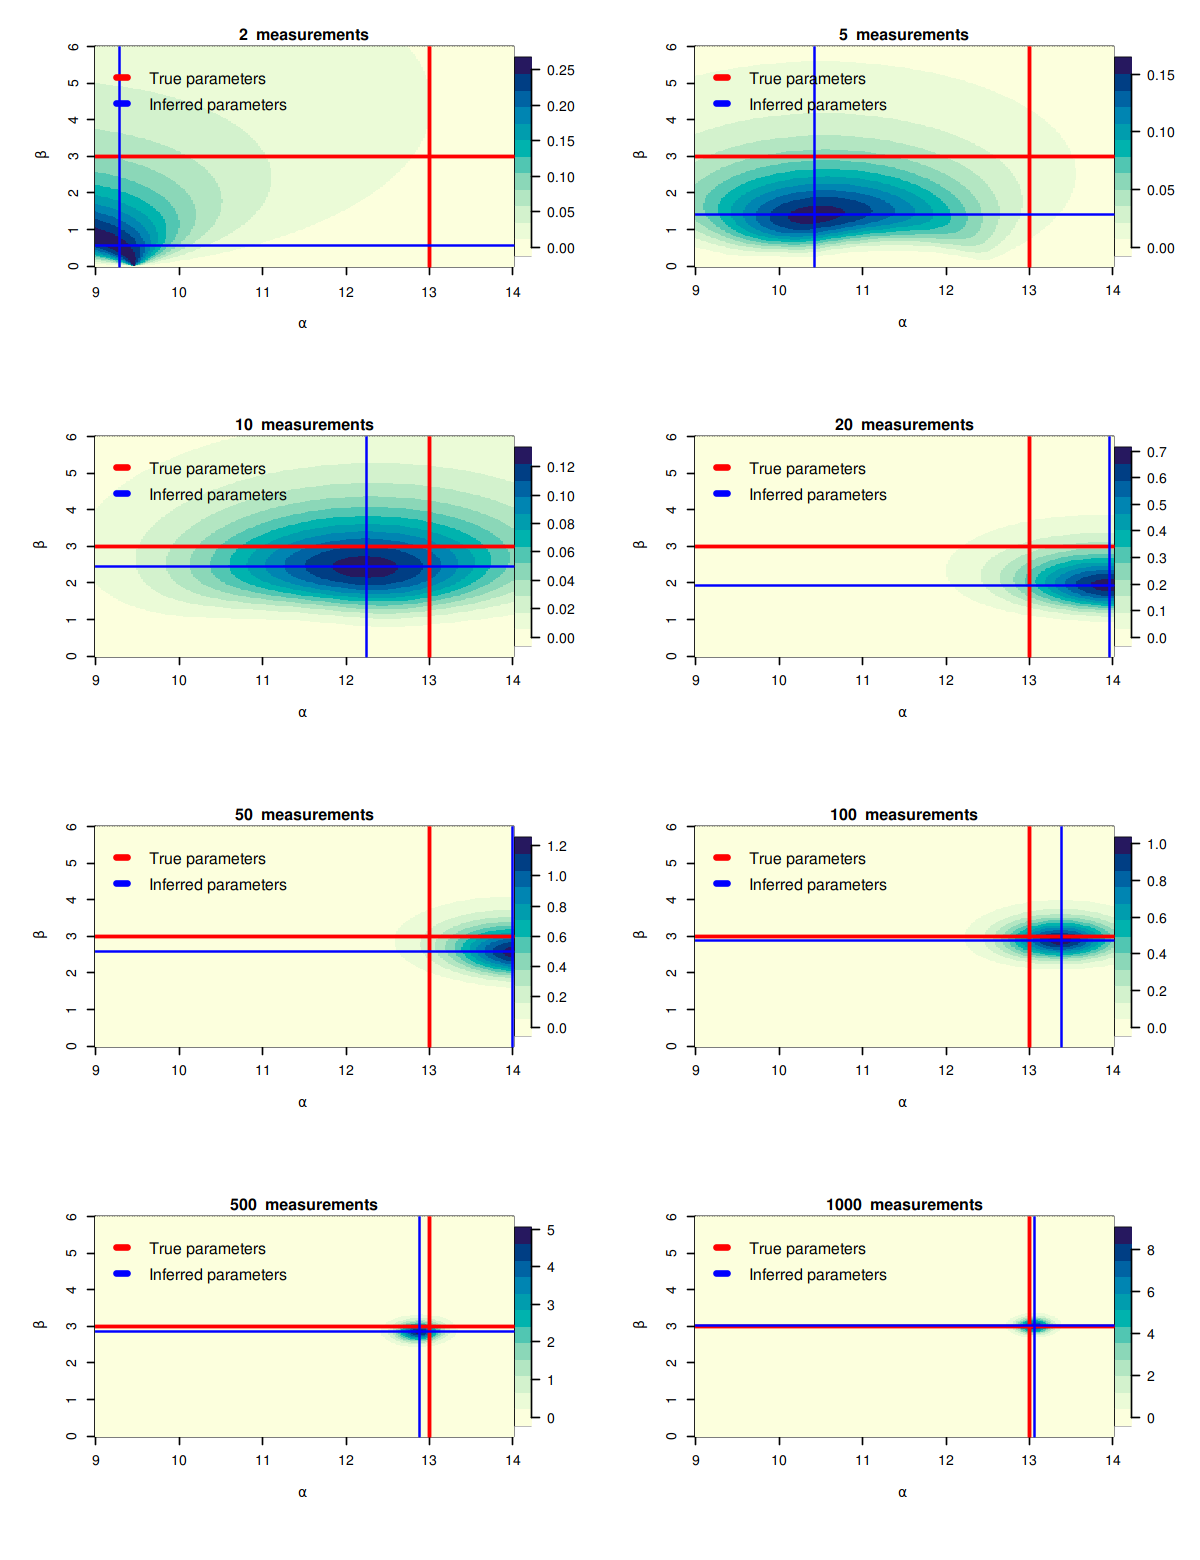

In [9]:
options(repr.plot.width=10, repr.plot.height=13, digits=6)
par(mar = c(4, 4, 1.5, 0.1)) 

#Sample data
alpha_true <- 13
beta_true  <- 3

#sample theta in an isotropic way (no reason to have preferred angles)
set.seed(32213)
theta <- runif(1000, min=-pi/2, max=pi/2)

#get x from theta
data <- alpha_true + beta_true * tan(theta)

# function that evaluates the log_likelihood for any alpha and beta
p.log <- function (a, b, data){
    logL <- 0
    for (x in data) {
        logL <- logL + log((1/pi)*(b/(b^2 + (x - a)^2)))
    }
    return (logL)
}

#suppose alpha and beta both unknown in a range 
step <-0.02
alpha <- seq(from=9, to=14, by=step)
beta <- seq(from =0, to=6,  by=step)

                                       
n_repetitions <- c(2, 5, 10, 20, 50, 100, 500, 1000)
par(mfrow=c(4,2)) 

for (i in n_repetitions){
    
    #evaluate the log likelihood (for the first i data) and normalize it according to the step of the axes
    p.log.post = outer(alpha, beta, function(alpha, beta) p.log(alpha, beta, data[1:i]))
    
    # set max to zero
    p.log.post <- p.log.post - max(p.log.post)
    p.post <- exp(p.log.post)
    p.post <- p.post/(sum(p.post)*step^2)
    
    #define a dataframe with the indexes of maximum values
    indexes_max <- which(p.post == max(p.post), arr.ind = TRUE)
    alpha_max <- alpha[indexes_max[1]]
    beta_max <- beta[indexes_max[2]]
                                                         
    image.plot(alpha, beta, p.post,
               xlab=expression(paste(alpha)),
               ylab=expression(paste(beta)),
               col = hcl.colors(12, "YlGnBu", rev = TRUE),
              main=paste(i," measurements"))
    abline(h = beta_true, v = alpha_true, col = "red",  lwd=2.3)                                           
    abline(h = beta_max, v = alpha_max, col = "blue", lwd=1.5)
    
    legend('topleft',
            legend=c("True parameters", "Inferred parameters"),
            col=   c("red"          ,   "blue"),
           lty=1:1,
           lwd=4:4,
           seg.len=0.5,
           bty = "n",
           cex=1.2,
           y.intersp=0.7
          )
}                                    

As one can see from the plots the 2D posterior becomes more and more peaked close to the true value increasing the number of measurements performed, vanishing elsewhere. 

From the last posterior evaluated in the grid one can compute the probability of one of the two parameters given the data and the model: since we are dealing with a 2D posterior the marginalization of the other parameter is required and it can be performed by summing over the line (or column) of the grid:

Is Posterior Normalized?	 TRUE 

alpha inferred: 	 13.06 
beta inferred:  	 3.02 
Are the marginalized posteriors normalized?
 TRUE 
 TRUE

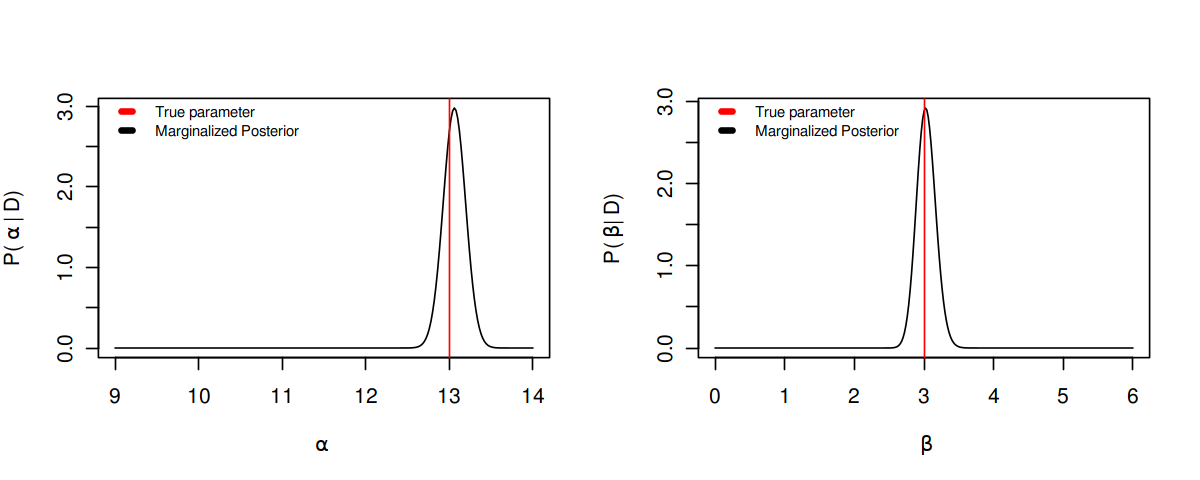

In [10]:
#check normalization: volume under the surface of the posterior
cat("Is Posterior Normalized?\t", all.equal(1,sum(p.post)*step^2),"\n\n")

cat("alpha inferred: \t", alpha_max, "\n")
cat("beta inferred:  \t", beta_max, "\n")

# marginalization
options(repr.plot.width=10, repr.plot.height=4) 
par( mfrow=c(1,2))

plot(alpha, p.post[,indexes_max[2]]/(sum(p.post[,indexes_max[2]])*step),
    type="l", 
    xlab = expression(paste(alpha)),
    ylab = expression(paste("P( ",alpha ,"| D)")))
abline(v=alpha_true, col="red")

    legend('topleft',
            legend=c("True parameter", "Marginalized Posterior"),
            col=   c("red"          ,   "black"),
           lty=1:1,
           lwd=4:4,
           seg.len=0.5,
           bty = "n",
           cex=0.7,
           y.intersp=2.5
          )


plot(beta, p.post[indexes_max[1],]/(sum(p.post[indexes_max[1],])*step),
    type="l", 
    xlab = expression(paste(beta)),
    ylab = expression(paste("P( ",beta ," | D)")))
abline(v=beta_true, col="red")


    legend('topleft',
            legend=c("True parameter", "Marginalized Posterior"),
            col=   c("red"          ,   "black"),
           lty=1:1,
           lwd=4:4,
           seg.len=0.5,
           bty = "n",
           cex=0.7,
           y.intersp=2.5
          )
cat("Are the marginalized posteriors normalized?\n",
    all.equal(1,sum( p.post[indexes_max[1],]/(sum(p.post[indexes_max[1],])*step))*step),"\n",
    all.equal(1,sum( p.post[,indexes_max[2]]/(sum(p.post[, indexes_max[2]])*step))*step))


## Exercise 3
Given the signal over Background example discussed last week, analyze and discuss the following cases:

a) vary the sampling resolution of used to generate the data, keeping the same sampling range
`xdat <- seq(from=-7*w, to=7*w, by=0.5*w`
* change the resolution w={0.1, 0.25, 1, 2, 3]
* Check the effect on the results


b) Change the ratio A/B used to simulate the data (keeping both positive in accordance with the prior)
* Check the effects on the results

### Solution
#### Preliminay Assumption
In the following exercise I will vary the resolution used to sample the data (that is the resolution of the detector). 

Since we are dealing with monoenergetic **photons** hitting on a detector, for instance a scintillator, I will assume that the width of the signal is due only to the resolution of the device, so in the limit of the resolution going to zero we expect a Dirac delta.

The signal itself doesn't have an own width (it actually has one: the *natural width* of a gamma transition but it is negligible with respect to the best available HPGe detectors). This is the reason why in the following exercise I will vary the width of the gaussian used to generate the data as well as the binwidth of the detector.

(It would have been different in other physical cases like in the case of a resonance where the signal has its own width that we can be sensible to or not, according to the ratio between the detector resolution and the width itself)

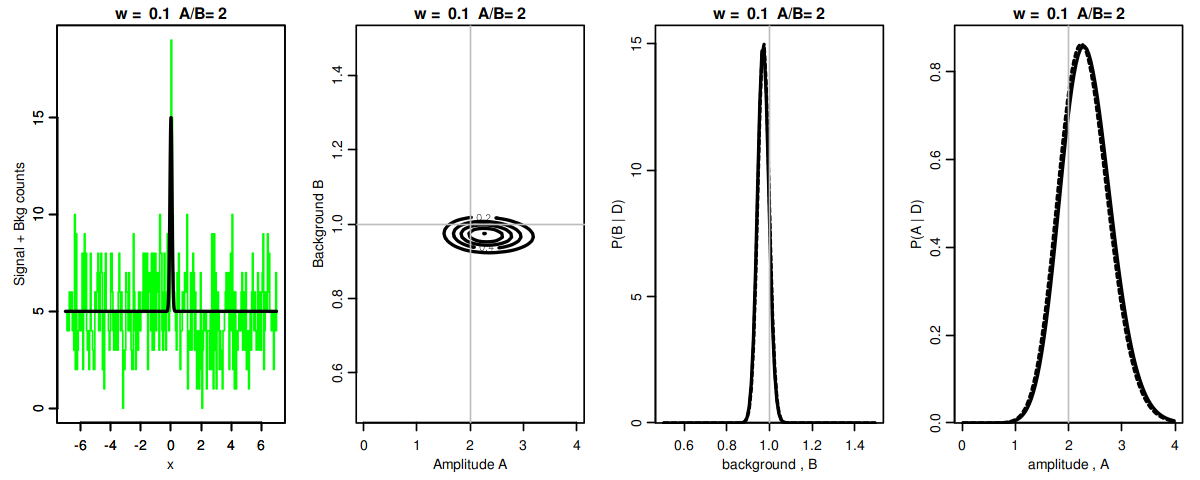

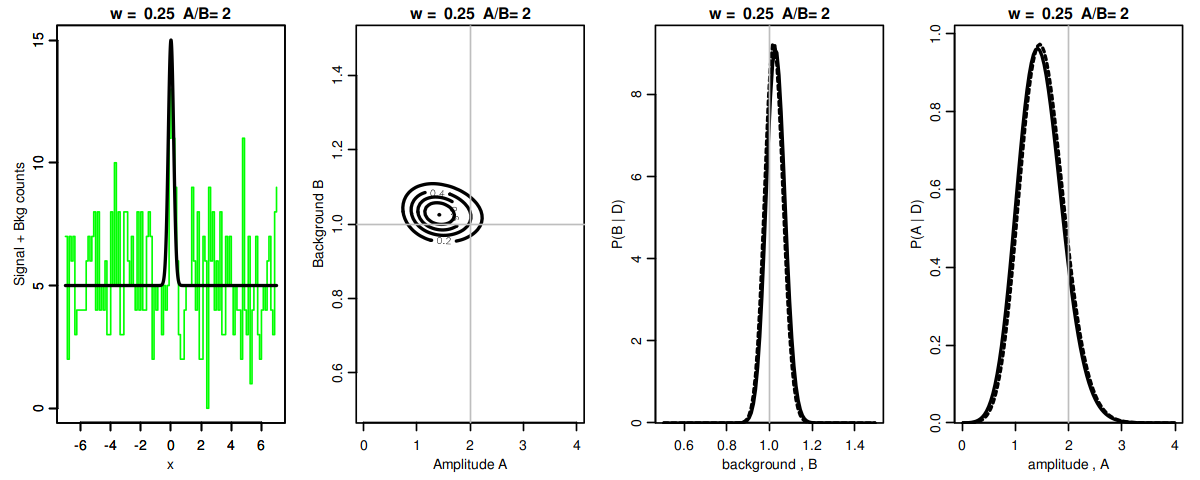

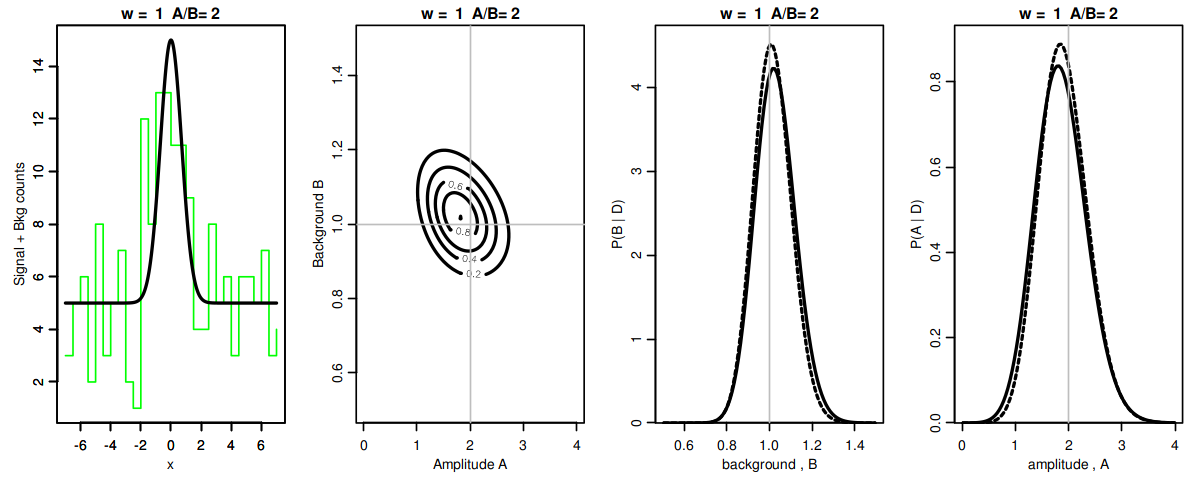

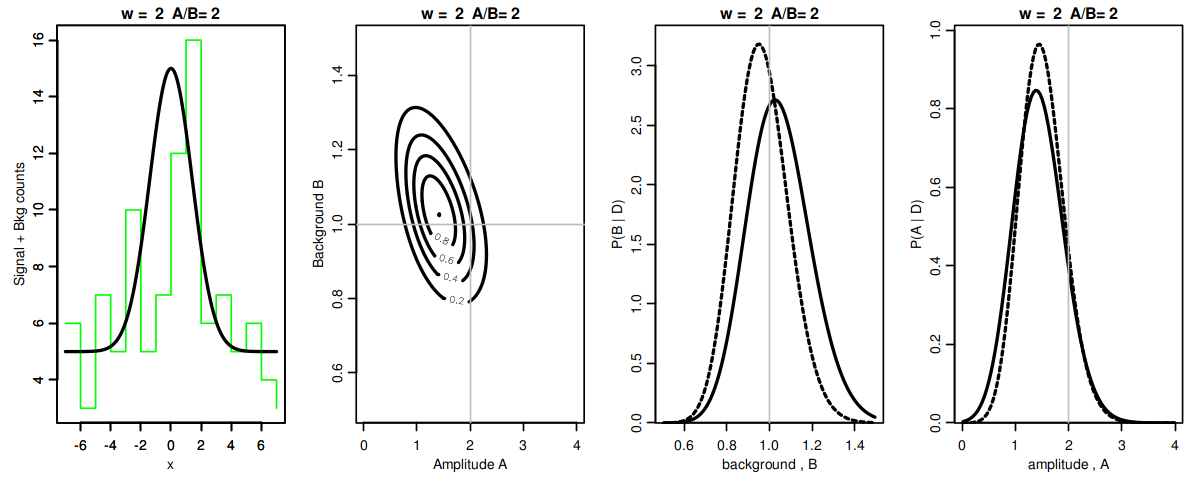

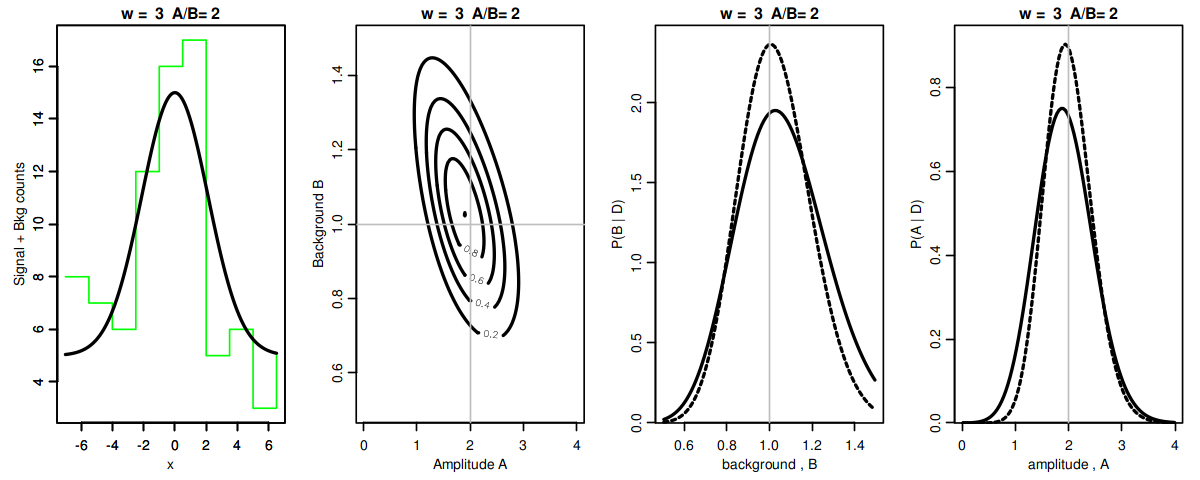

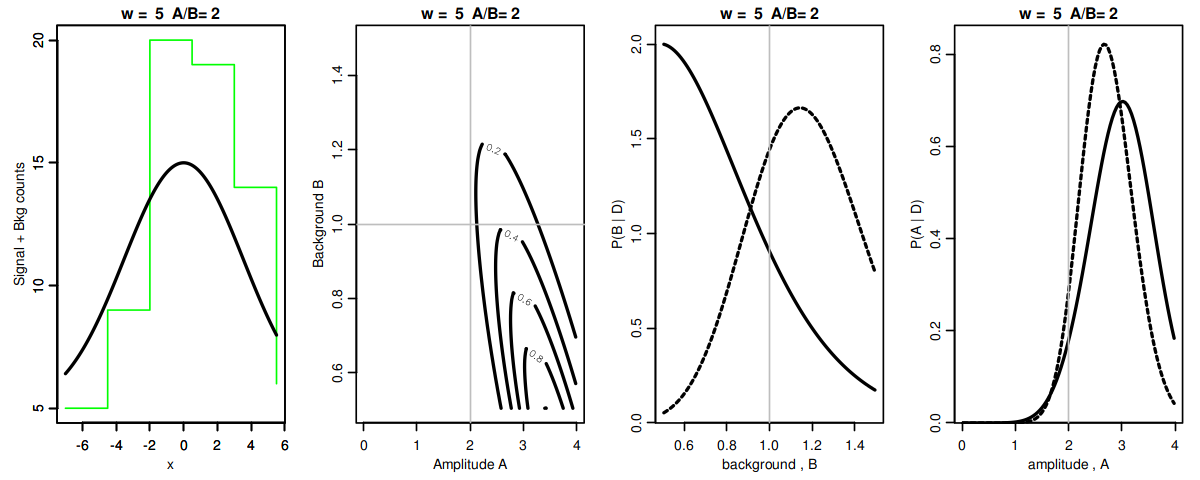

In [11]:
# Define the shape of the signal + bkg
signal <- function (x, a , b, x0, w, t){
    t*(a*exp(-(x-x0)^2/w^2)+b)
}

# Model Parameters
x0 <- 0        # Signal peak   (known)
w_list  <- c(0.1, 0.25, 1, 2, 3, 5)        # Signal width  (known from the detector)
A.true <- 2    # Signal Amplitude (to be inferred)
B.true <- 1    # Bkg amplitudde   (to be inferred)
Delta.t <- 5   # exposure time (known)

#Generate observed data
set.seed(123123)

for (w in w_list){
    
    # vary the resolution of sampling, keeping fixed the range
    xdat <- seq(from=-7, to=7, by=0.5*w)                   
    s.true <-signal (xdat, A.true, B.true, x0, w, Delta.t)   
    ddat <- rpois (length(s.true), s.true)                   

    # GRAPHIC real smooth signal
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.01*w)
    splot <- signal(xplot, A.true, B.true, x0, w, Delta.t)

    # PLOT
    options(repr.plot.width=10, repr.plot.height=4) 
    par( mfrow=c(1,4), mgp=c(2,0.8,0), mar=c(3.5,3.5,1.5,1), oma=0.1*c(1,1,1,1))
  
    plot(xdat, ddat, 
         type="s", lwd=1, col="green",
         ylab="", xlab="",
         xlim=range(xplot), ylim=range(c(splot, ddat)))
    par(new=TRUE )
    plot (xplot, splot,
          type="l", lwd = 2,
          xlab="x", ylab="Signal + Bkg counts", main=paste("w = ",w, " A/B=",A.true/B.true),
          xlim=range(xplot), ylim=range(c(splot, ddat)))
    
    #Grid for the posterior
    alim <- c(0, 4)
    blim <- c(0.5, 1.5)
    Nsamp <- 100
    uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp)
    delta_a <- diff(alim)/Nsamp
    delta_b <- diff(blim)/Nsamp
    a <- alim[1] + diff(alim)*uniGrid   # a is length=Nsamp
    b <- blim[1] + diff(blim)*uniGrid   # b is length=Nsamp

    # Log posterior
    log.post <- function (d, x, a, b ,x0, w, t){
        if(a<0 || b<0) {return (-Inf)}                                 
        sum(dpois(d, lambda = signal(x, a, b, x0, w, t), log=TRUE))    
    }

    #compute log unnormalized posterior on grid
    z <- matrix (data=NA, nrow=length(a), ncol=length(b))    
    for(j in 1:length(a)){                                   #fill the matrix
        for (k in 1:length(b)){
            z[j, k] <- log.post(ddat, xdat, a[j], b[k], x0, w, Delta.t)
        }
    }

    z <- z - max(z)

# 2nd PLOT : unnormalized posterior
    contour (a, b, exp(z),
             nlevels=5,
             labcex=0.5, 
             lwd=2,
             xlab="Amplitude A",
             ylab="Background B",
            main=paste("w = ",w, " A/B=",A.true/B.true))
    abline(v=2, h=1, col="grey")
    
    # Compute normalized marginalized posteriors
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/( delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum)
    p_b_D <- p_b_D/( delta_b*sum(p_b_D))
    
    # Compute normalized conditional posteriors using true values of conditioned parameters .
    p_a_bD <- exp( Vectorize (log.post , "a")(ddat , xdat , a, B.true , x0, w, Delta.t))
    p_a_bD <- p_a_bD/( delta_a*sum(p_a_bD))
    p_b_aD <- exp( Vectorize (log.post , "b")( ddat , xdat , A.true , b, x0, w, Delta.t))
    p_b_aD <- p_b_aD/( delta_b*sum(p_b_aD))


    options(repr.plot.width=10, repr.plot.height=4) 
# 3rd PLOT marginalized posteriors
    plot(b, p_b_D, xlab="background , B", yaxs="i",
        ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B | D)",
        type="l", lwd=2,main=paste("w = ",w, " A/B=",A.true/B.true))
    
    lines (b, p_b_aD , lwd=2, lty=2)
    
    abline (v=B.true , col="grey")
    
# 4th PLOT  marginalized posteriors given the true conditioned parameter  
    plot(a, p_a_D, xlab="amplitude , A", yaxs="i",
        ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A | D)",
        type="l", lwd=2,main=paste("w = ",w, " A/B=",A.true/B.true))
    
    lines (a, p_a_bD , lwd=2, lty=2)
    
    abline (v=A.true , col="grey")
 }   


From the contour plots as weel as from the marginalized posteriors one can see that the uncertainties on the values of the parameters A and B becomes wider and wider as the resolution gets worse. Moreover, the marginalized posterior and the one using the true values of the conditioned parameter pull away from each other.


b) Change the ratio A/B used to simulate the data (keeping both positive in accordance with the prior)
* Check the effects on the results
#### Solution
We keep the value of B fixed to 1 and we vary A as a multiple of B for a certain list of coefficients:

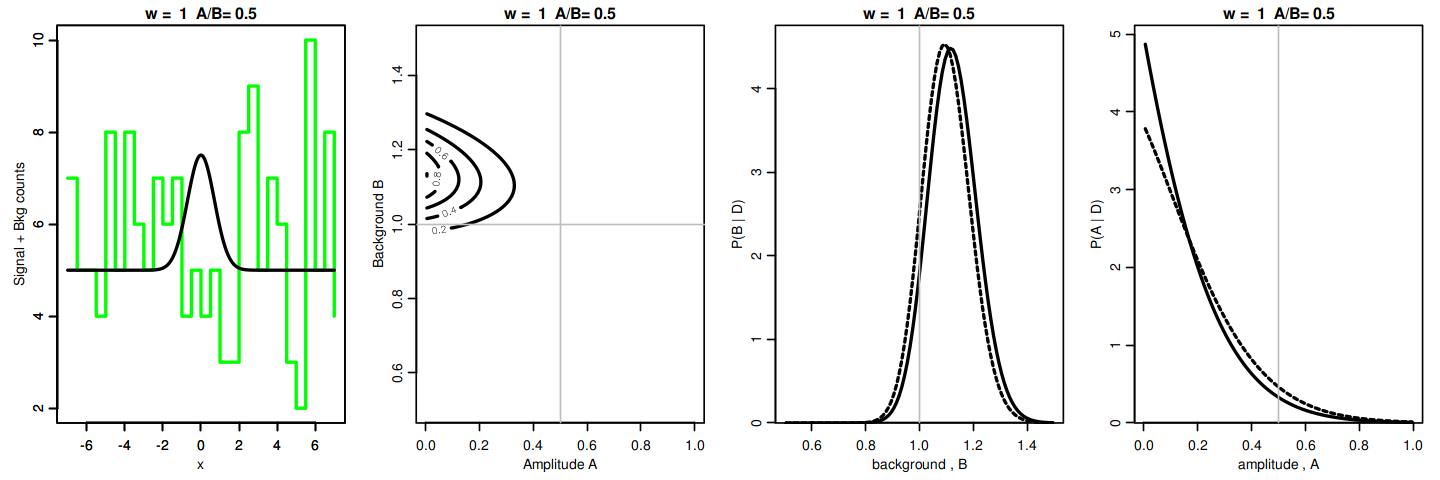

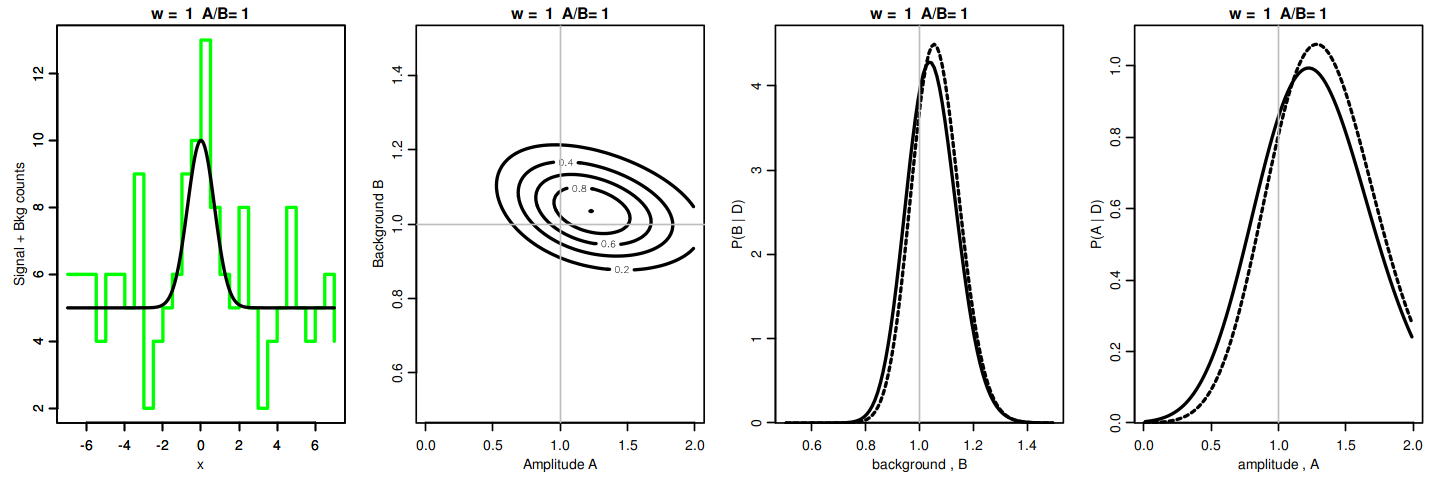

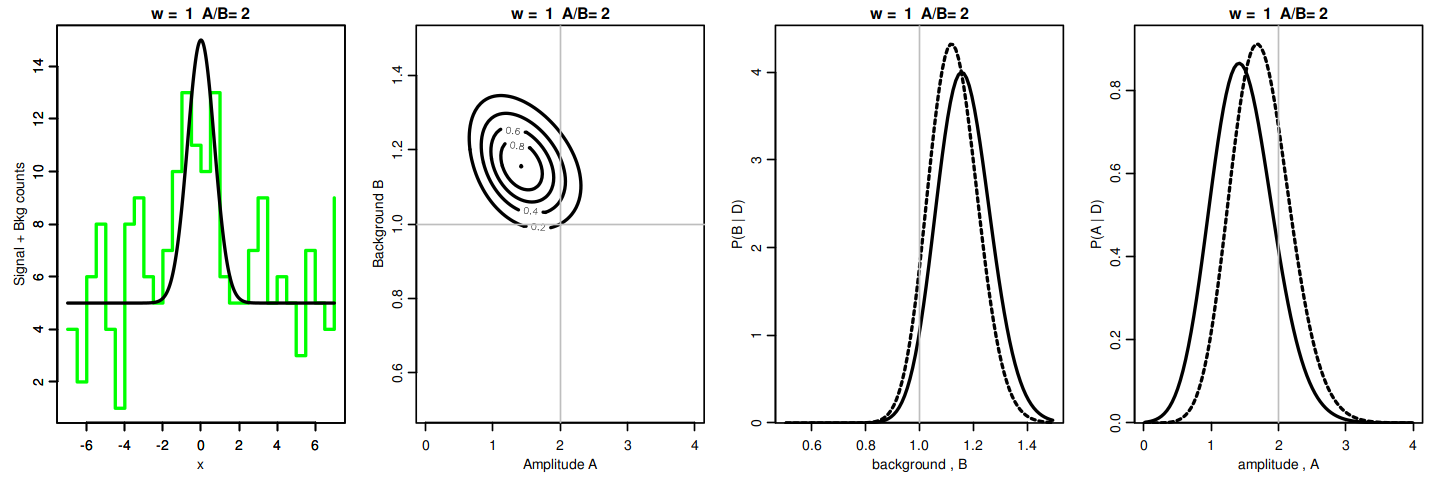

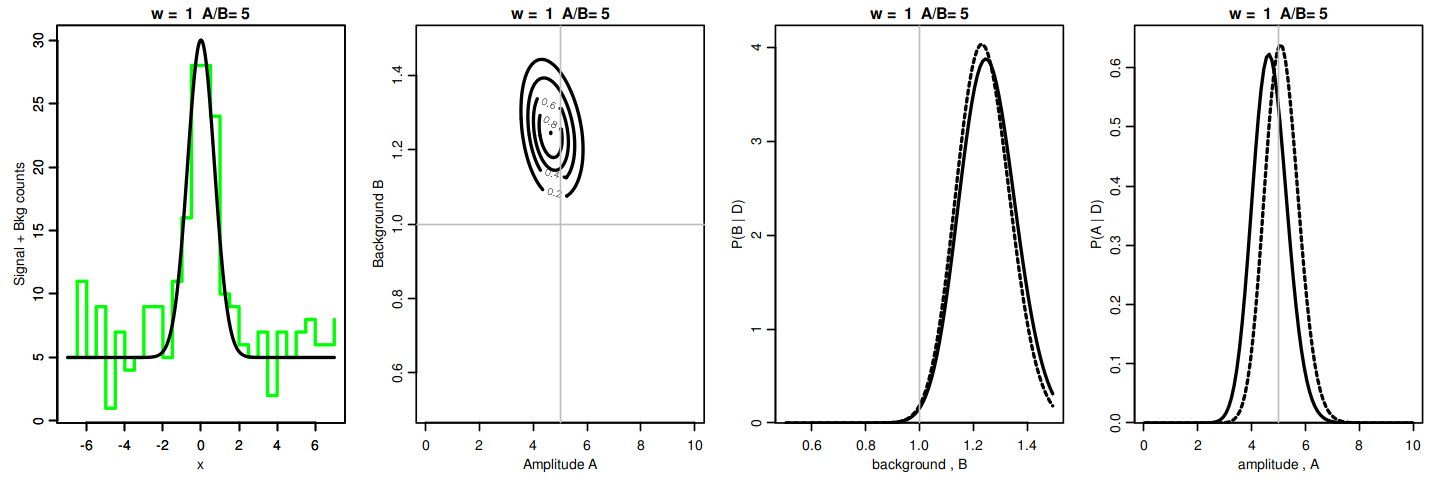

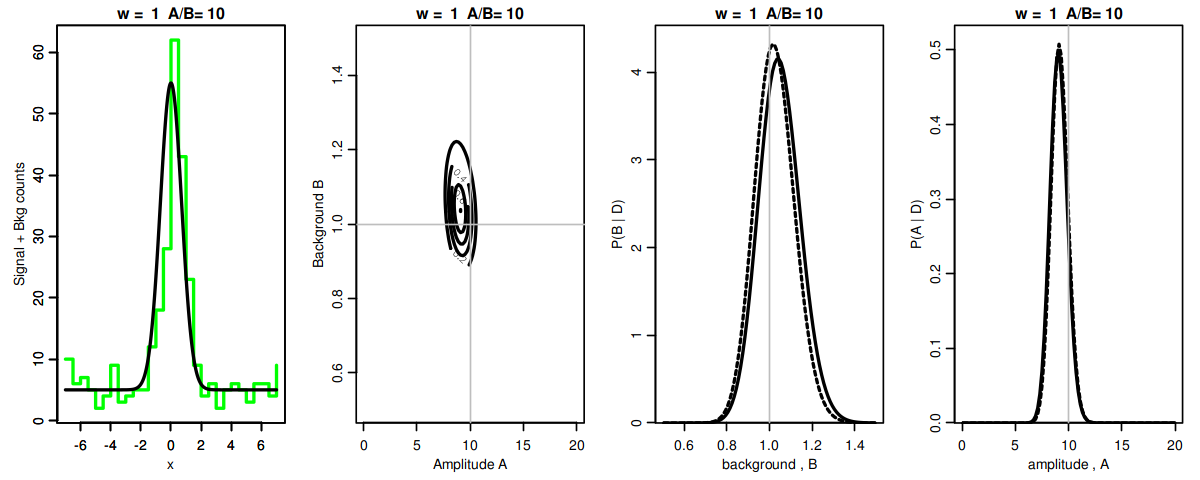

In [12]:

# Model Parameters
x0 <- 0        # Signal peak   (known)
w  <- 1        # Signal width  (known from the detector)
B.true <- 1    # Bkg amplitude  
A.true_list <- B.true*c(0.5, 1, 2, 5, 10) 
Delta.t <- 5   # exposure time (known)

#Generate observed data
set.seed(1999)
for (A.true in A.true_list){
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)               #histo edges
    s.true <-signal (xdat, A.true, B.true, x0, w ,Delta.t) #function in the edges 
    ddat <- rpois (length(s.true), s.true)                 # real data (number of counts in the edges)
    
    # GRAPHIC
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.01*w)
    splot <- signal(xplot, A.true, B.true, x0, w, Delta.t)

    # PLOT
    options(repr.plot.width=12, repr.plot.height=4)
    par( mfrow=c(1,4), mgp=c(2,0.8,0), mar=c(3.5,3.5,1.5,1), oma=0.1*c(1,1,1,1))

    
    plot(xdat, ddat, 
         type="s", lwd=2, col="green",
         ylab="", xlab="",
         xlim=range(xplot), ylim=range(c(splot, ddat)))
   par(new=TRUE) 
   plot (xplot, splot,
          type="l", lwd = 2,
          xlab="x", ylab="Signal + Bkg counts", main=paste("w = ",w, " A/B=",A.true/B.true),
          xlim=range(xplot), ylim=range(c(splot, ddat)))



    #Grid for the posterior
    alim <- c(0, 2*A.true)
    blim <- c(0.5, 1.5)
    Nsamp <- 100
    uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp)
    delta_a <- diff(alim)/Nsamp
    delta_b <- diff(blim)/Nsamp
    a <- alim[1] + diff(alim)*uniGrid   # a is length=Nsamp
    b <- blim[1] + diff(blim)*uniGrid   #b is length=Nsamp

    # Log posterior
    log.post <- function (d, x, a, b ,x0, w, t){
        if(a<0 || b<0) {return (-Inf)}                                 #the effect of the prior
        sum(dpois(d, lambda = signal(x, a, b, x0, w, t), log=TRUE))    #sum the log of a poisson distr.
    }

    #compute log unnormalized posterior on a  regular grid
    z <- matrix (data=NA, nrow=length(a), ncol=length(b))    #define empty matrix
    for(j in 1:length(a)){                                   #fill the matrix
        for (k in 1:length(b)){
            # for a given a and b evaluate the log.post: 
            # log of poisson evaluated in ddat with lambda given by the signal
            # you have one log for each (xdat, ddat) pair, then you sum over all of them
            z[j, k] <- log.post(ddat, xdat, a[j], b[k], x0, w, Delta.t)
        }
    }

    # shift
    z <- z - max(z)

    # plot unnormalized posterior
    contour (a, b, exp(z),
             nlevels=5,
             labcex=0.5, 
             lwd=2,
             xlab="Amplitude A",
             ylab="Background B",
             main=paste("w = ",w, " A/B=",A.true/B.true))
    abline(v=A.true, h=B.true, col="grey")
    
    # Compute normalized marginalized posteriors
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/( delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum)
    p_b_D <- p_b_D/( delta_b*sum(p_b_D))
    
    # Compute normalized conditional posteriors using true values of conditioned parameters .
    p_a_bD <- exp( Vectorize (log.post , "a")(ddat , xdat , a, B.true , x0, w, Delta.t))
    p_a_bD <- p_a_bD/( delta_a*sum(p_a_bD))
    p_b_aD <- exp( Vectorize (log.post , "b")( ddat , xdat , A.true , b, x0, w, Delta.t))
    p_b_aD <- p_b_aD/( delta_b*sum(p_b_aD))


    options(repr.plot.width=10, repr.plot.height=4) 
    
    # Plot the 1D marginalized posteriors
    plot(b, p_b_D, xlab="background , B", yaxs="i",
        ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B | D)",
        type="l", lwd=2, main=paste("w = ",w, " A/B=",A.true/B.true))
    
    lines (b, p_b_aD , lwd=2, lty=2)
    
    abline (v=B.true , col="grey")
    
    plot(a, p_a_D, xlab="amplitude , A", yaxs="i",
        ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A | D)",
        type="l", lwd=2, main=paste("w = ",w, " A/B=",A.true/B.true))
    
    lines (a, p_a_bD , lwd=2, lty=2)
    
    abline (v=A.true , col="grey")
 }   

Looking at both the contour plots and the marginalized posteriors, increasing the ratio between the amplitude and the background, the inference on the parameter A gets better and the uncertainty decreases. 

The marginalized posterior of the parameter B is not affected by the change in the value of A